In [1]:
## Using skin detector to detect face

In [2]:
import numpy as np
import cv2
from scipy import misc
import os
import shutil
# from pyimagesearch import imutils

In [30]:
#list of images in the directory
list_images = os.listdir("data")

# Min and max values to be considered as skin :D
minLimit = np.array([0,40,80], dtype = "uint8")
maxLimit = np.array([30,255,255], dtype = "uint8")


#flatten = 0 if no grayscale, 1 if yes.
for img in list_images:
    if(img == ".DS_Store"):
        continue
        
    #print(img)
    imgpath = os.path.join("/Users/akarsha/Downloads/BIOM_ASGN1/Advanced_Biometrics_Assignments/Assignment 2/AR_FaceDB/data",img)
    image = cv2.imread(imgpath)
    print(image.shape)
    W = 400
    height, width, depth = image.shape
    imgScale = W/width
    newX,newY = image.shape[1]*imgScale, image.shape[0]*imgScale
    #   image = misc.imread((imgpath,img), flatten = 0)
    #   image = imutils.resize(image, width = 400)
    image = cv2.resize(image,(int(newX),int(newY)))
    # we're working with HSV not RGB
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    skin_mask = cv2.inRange(hsv,minLimit,maxLimit)
    
    #use elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    
    #apply erosions and dilations - remove false-positives
    skin_mask = cv2.erode(skin_mask, kernel, iterations = 2)
    skin_mask = cv2.dilate(skin_mask, kernel, iterations = 2)
    
    # blur the mask - removes noise 
    skin_mask = cv2.GaussianBlur(skin_mask,(3,3),0)
    skin = cv2.bitwise_and(image,image, mask = skin_mask)
    im2, cnts, hierarchy = cv2.findContours(skin_mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    wmax = 0
    hmax = 0
    diff = 99999
    for c in cnts:
        if(cv2.contourArea(c) < 3000):
            continue
        (x,y,w,h) = cv2.boundingRect(c)
        if((hmax < h or wmax < w) and abs(h-w)<diff):
            xx,yy,hmax,wmax = x,y,h,w
            diff = abs(h-w)
            
    cv2.rectangle(skin,(xx,yy),(xx+wmax,yy+hmax),(0,255,0),2)
#     print(x,y,w,h)
    cv2.imwrite(os.path.join("/Users/akarsha/Downloads/BIOM_ASGN1/Advanced_Biometrics_Assignments/Assignment 2/skinDetection",img),skin)
cv2.waitKey(0)
cv2.destroyAllWindows()


(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 

(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 

(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 

(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 

(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 

(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 

In [26]:
## Approach 2 - Using Histogram of Oriented Gradient and SVM---------------------

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from skimage import data,color,feature
import skimage.data
from sklearn.svm import SVC

In [ ]:
# Obtain a set of image thumbnails of faces to constitute "positive" training samples.

# Obtain a set of image thumbnails of non-faces to constitute "negative" training samples.

# Extract HOG features from these training samples.

# Train a linear SVM classifier on these samples.

# For an "unknown" image, pass a sliding window across the image, using the model to evaluate whether that window contains a face or not.

# If detections overlap, combine them into a single window.

In [36]:
# list_images --- (576, 768, 3)*3316

#--------------------------- TRAINING -----------------------------------------

# POSITIVE IMAGES
from sklearn.datasets import fetch_lfw_people

lfw_faces = fetch_lfw_people()
positive_patches = lfw_faces.images


/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.re

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/akarsha/anaconda/lib/python3.6/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imag

In [41]:
print(positive_patches.shape)

# NEGATIVE TRAINING - same sized thumbnails
from skimage import data,transform
from sklearn.feature_extraction.image import PatchExtractor
from itertools import chain

non_faces = ['camera','coins','page']
non_face_images = [color.rgb2gray(getattr(data,img)()) for img in non_faces]



(13233, 62, 47)


In [42]:
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if(scale != 1):
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in non_face_images for scale in [0.5, 1.0, 2.0]])

X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

/Users/akarsha/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/akarsha/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [43]:
print(negative_patches.shape)

(9000, 62, 47)


In [44]:
print(X_train.shape)

(22233, 1215)


In [61]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV


grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_
# grid = LinearSVC()
# grid.fit(X_train, y_train)
# grid.best_score_


0.9734628705078037

In [62]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

(144, 140)
(62, 47)


/Users/akarsha/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


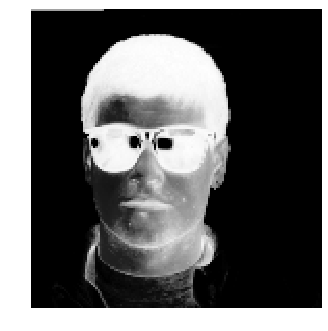

/Users/akarsha/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(3135, 1215)

In [154]:
test_image = cv2.imread("m-022-23.bmp")
# test_image = skimage.data.astronaut()
# plt.imshow(test_image)
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.25)
test_image = test_image[:160, 40:180]

print(test_image.shape)
plt.imshow(test_image)
plt.axis('off')
print(positive_patches[1].shape)
plt.show()
def sliding_window(img, patch_size=positive_patches[0].shape, istep=2, jstep=2, scale=0.5):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if(scale != 1):
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

36
72 2804 38
haha -  32 2804


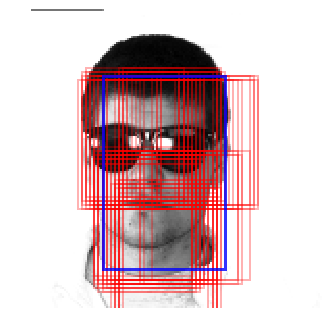

In [155]:
labels = grid.predict(patches_hog)
tot = labels.sum()
print(int(tot/2))
fig, ax = plt.subplots()
# cv2.imwrite(test_image)
ax.imshow(test_image, cmap='gray')
ax.axis('off');
count = 0
Ni, Nj = positive_patches[0].shape
Ni = Ni*(3/2)
Nj = Nj*(5/4)
indices = np.array(indices)
mini = 0
maxj = 0

for i, j in indices[labels == 1]:
#     print(i,j)
    if(count == 10):
        mini = i
#     if(count ==):
    maxj = maxj+j
    count = count+1
    ax.add_patch(plt.Rectangle((j,i), (Nj*4)/5, (Ni*2)/3, edgecolor='red', alpha=0.3, lw=2, facecolor='none'))


ax.add_patch(plt.Rectangle((int(maxj/(count+10)),mini), Nj, Ni, edgecolor='blue', alpha=0.8, lw=3, facecolor='none'))
print(count,maxj,int(maxj/count))
print("haha - ",mini,maxj)
# cv2.imwrite(,skin)
plt.show()
